In [1]:
from To_sim.for_multi import get_r_sigma_Z_D,get_r_sigma_Z_MF_D
import numpy as np
import parmap
from tqdm.notebook import tqdm
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import glob
from To_sim.for_multi import get_sol,get_sol_MF,get_sol_Last,get_sol_MF_Last

In [2]:
N = 1000
np.random.seed(0)
theta_random = np.random.uniform(0,2*np.pi,N)
omega = 1
K,b = 5,0.5
db = 0.05
t_end,dt = 400,0.1
t = np.arange(0, t_end+dt/2, dt)
Ds = np.arange(0,4+db/2,db)

b = 1.1
D = 1.5

In [3]:
Ds = np.linspace(0.0,2.0,21)


In [4]:
B_RM,B_S,B_C = [],[],[]
B_RA = []
B_Ts = []
for seed in tqdm(range(10)):
    np.random.seed(0)
    theta_random = np.random.uniform(0,2*np.pi,N)
    B_ra = []
    B_rm = []
    B_sigmas = []
    B_chis = []
    Ts = []

    for T,RA,RM,chi,sigma_phi in parmap.map(get_sol_MF_Last,Ds,theta_random,t,b,omega,N,K,pm_pbar=False, pm_processes=8):
        Ts.append(T)
        B_ra.append(RA)
        B_rm.append(RM)
        B_sigmas.append(sigma_phi)
        B_chis.append(chi)
    B_RM.append(B_rm)
    B_RA.append(B_ra)
    B_S.append(B_sigmas)
    B_C.append(B_chis)
    B_Ts.append(Ts)

  0%|          | 0/10 [00:00<?, ?it/s]

In [131]:
T_E = []
for i in range(10):
    T_ = []
    for D in Ds:
        T,RA,CHI,S = get_sol_MF(theta_random,t,D,b,omega,N,K)
        r_MF = np.abs(RA)
        T_.append(T[-1])
    T_E.append(T_)

In [5]:
B_Ts = np.array(B_Ts)

In [6]:
B_Ts[0].shape

(21, 1000)

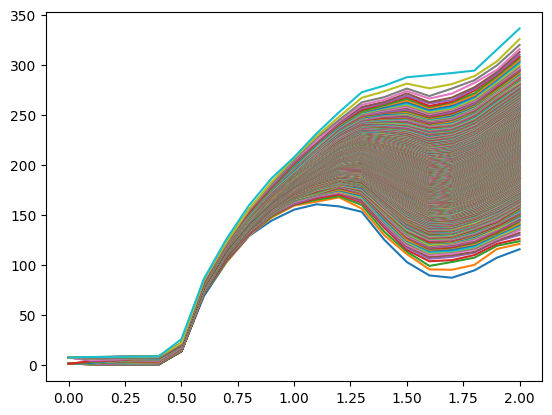

In [7]:
BBB = np.sort(B_Ts,axis=2)
BM = np.mean(BBB,axis=0)
plt.plot(Ds,BM)

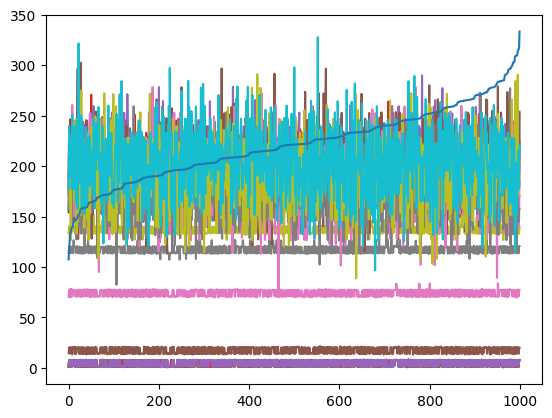

ValueError: x and y can be no greater than 2D, but have shapes (21,) and (21, 1000, 21)

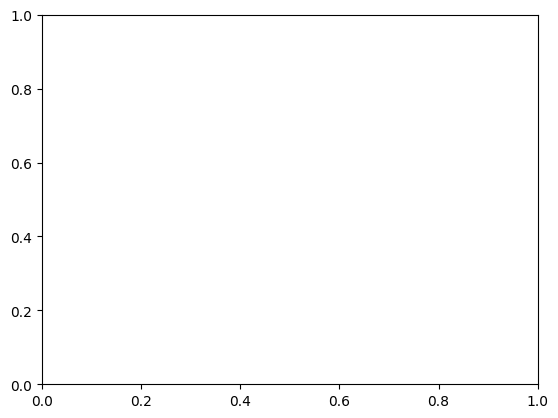

In [33]:
plt.plot(B_Ts[0].T[AA].T)

In [25]:
for BT in B_Ts:
    # plt.plot(BT.T[AA])
    print(BT.shape)

(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)
(21, 1000)


In [9]:
A_ = np.argsort(B_Ts[0],axis=1)

In [173]:
T_E = np.array(T_E)
T_ES = np.sort(T_E,axis=2)//(np.pi*2)
T_EM = np.mean(T_ES,axis=0)
T_EMM = np.mean(T_EM,axis=1)
T_EMS = np.std(T_EM,axis=1)


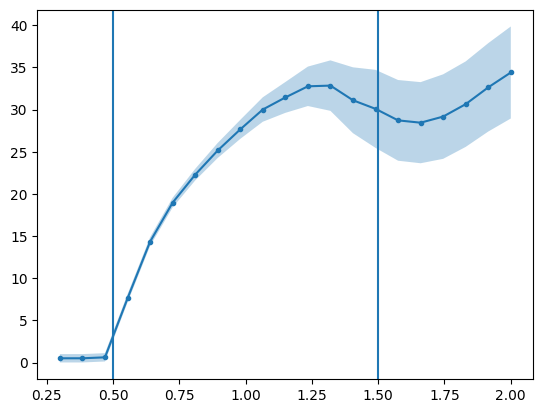

In [181]:
plt.plot(Ds,T_EMM,'.-')
plt.fill_between(Ds,T_EMM-T_EMS,T_EMM+T_EMS,alpha=0.3)
plt.axvline(1.5)
plt.axvline(0.5)

In [168]:
T_EM.shape

(21, 1000)

In [163]:
T_EM.shape

(21, 1000)

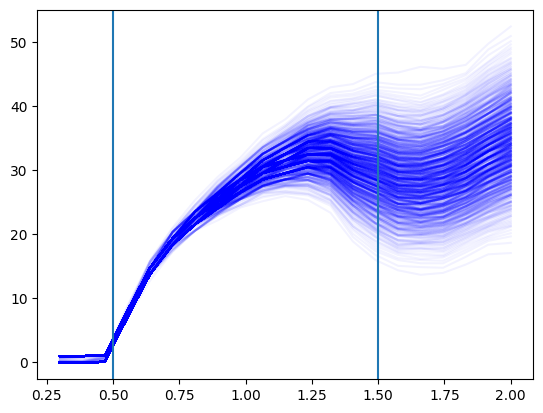

In [167]:
plt.plot(Ds,T_EM,color='blue',alpha=0.05)
plt.axvline(1.5)
plt.axvline(0.5)
plt.ylabel(r'$A$')

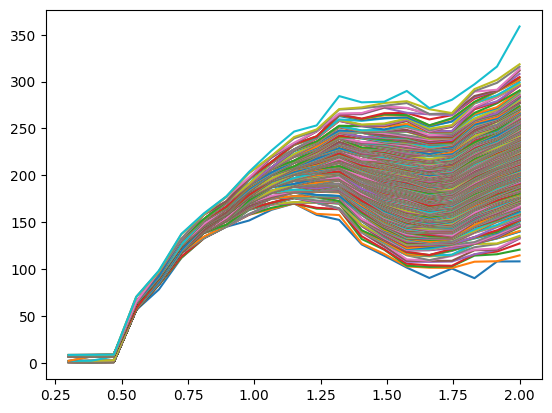

In [130]:
plt.plot(Ds,np.sort(T_,axis=1))

array([[  7.4560825 ,   7.49474015,   7.15736383, ...,   7.42185278,
          1.3310812 ,   7.5462535 ],
       [  7.80349631,   7.76854955,   7.94026399, ...,   7.53469694,
          1.67231319,   7.50831168],
       [  7.28065916,   1.6657991 ,   7.63551648, ...,   8.09551878,
          1.13663054,   7.67518789],
       ...,
       [223.26168879, 189.11269403, 228.38947424, ..., 222.21365119,
        171.07956072, 170.2176379 ],
       [209.16474652, 196.37180176, 177.49423996, ..., 230.6799625 ,
        182.07983377, 208.02825331],
       [212.6236166 , 222.64956767, 240.88107456, ..., 264.75062622,
        254.21951891, 226.23924055]])

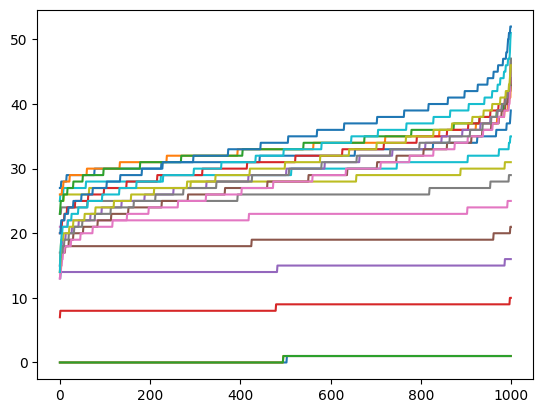

In [158]:
for T_ in T_E[0]:
    plt.plot(np.sort(T_//(np.pi*2)))

In [111]:
D_RA = np.diff(np.angle(RA))
dt*np.mean(np.diff(np.where(D_RA<-2)))

nan

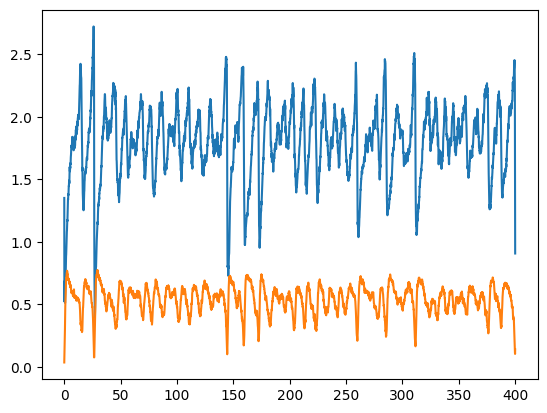

In [112]:
plt.plot(t,np.angle(RA))
plt.plot(t,np.abs(RA))

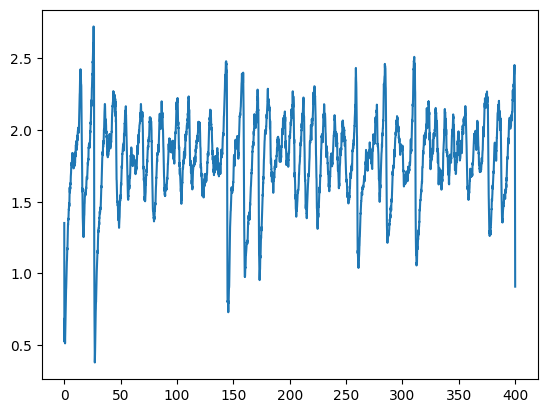

In [113]:
plt.plot(t,np.angle(RA))

# ER network

In [ ]:
N_ER = pickle.load(open('DATA/ER GRAPH/ER.pickle','rb'))
mk = N_ER[0,'mk']
Aij= N_ER[0,'Aij']
G = N_ER[0,'G']

In [ ]:
B_RM,B_S,B_C = [],[],[]
B_RA = []
B_Ts = []
for seed in tqdm(range(1)):
    np.random.seed(0)
    theta_random = np.random.uniform(0,2*np.pi,N)
    B_ra = []
    B_rm = []
    B_sigmas = []
    B_chis = []
    Ts = []

    for T,RA,RM,chi,sigma_phi in parmap.map(get_sol_Last,Ds,theta_random,t,b,omega,N,K,mk,Aij,pm_pbar=False, pm_processes=8):
        Ts.append(T)
        B_ra.append(RA)
        B_rm.append(RM)
        B_sigmas.append(sigma_phi)
        B_chis.append(chi)
    B_RM.append(B_rm)
    B_RA.append(B_ra)
    B_S.append(B_sigmas)
    B_C.append(B_chis)
    B_Ts.append(Ts)

  0%|          | 0/1 [00:00<?, ?it/s]

# SF Network

In [92]:
from To_sim.for_multi import get_r_sigma_Z_D,get_r_sigma_Z_MF_D
import numpy as np
import parmap
from tqdm.notebook import tqdm
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import glob
from To_sim.for_multi import get_sol,get_sol_MF,get_sol_Last,get_sol_MF_Last

In [ ]:
N = 1000
np.random.seed(0)
theta_random = np.random.uniform(0,2*np.pi,N)
omega = 1
K,b = 5,0.5
db = 0.05
t_end,dt = 400,0.1
t = np.arange(0, t_end+dt/2, dt)
Ds = np.arange(0,4+db/2,db)

b = 1.1
D = 1.5

In [ ]:
Ds = np.linspace(0.0,2.0,21)


In [80]:
N_SF = pickle.load(open('DATA/SF GRAPH/SF.pickle','rb'))
mk = N_SF[0,'mk']
Aij= N_SF[0,'Aij']
G = N_SF[0,'G']

In [81]:
B_RM,B_S,B_C = [],[],[]
B_RA = []
B_Ts = []
for seed in tqdm(range(1)):
    np.random.seed(0)
    theta_random = np.random.uniform(0,2*np.pi,N)
    B_ra = []
    B_rm = []
    B_sigmas = []
    B_chis = []
    Ts = []

    for T,RA,RM,chi,sigma_phi in parmap.map(get_sol_Last,Ds,theta_random,t,b,omega,N,K,mk,Aij,pm_pbar=False, pm_processes=8):
        Ts.append(T)
        B_ra.append(RA)
        B_rm.append(RM)
        B_sigmas.append(sigma_phi)
        B_chis.append(chi)
    B_RM.append(B_rm)
    B_RA.append(B_ra)
    B_S.append(B_sigmas)
    B_C.append(B_chis)
    B_Ts.append(Ts)

  0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
N_ER.keys()

dict_keys([(0, 'G'), (0, 'Aij'), (0, 'D'), (0, 'mk'), (1, 'G'), (1, 'Aij'), (1, 'D'), (1, 'mk'), (2, 'G'), (2, 'Aij'), (2, 'D'), (2, 'mk'), (3, 'G'), (3, 'Aij'), (3, 'D'), (3, 'mk'), (4, 'G'), (4, 'Aij'), (4, 'D'), (4, 'mk'), (5, 'G'), (5, 'Aij'), (5, 'D'), (5, 'mk'), (6, 'G'), (6, 'Aij'), (6, 'D'), (6, 'mk'), (7, 'G'), (7, 'Aij'), (7, 'D'), (7, 'mk'), (8, 'G'), (8, 'Aij'), (8, 'D'), (8, 'mk'), (9, 'G'), (9, 'Aij'), (9, 'D'), (9, 'mk'), (10, 'G'), (10, 'Aij'), (10, 'D'), (10, 'mk'), (11, 'G'), (11, 'Aij'), (11, 'D'), (11, 'mk'), (12, 'G'), (12, 'Aij'), (12, 'D'), (12, 'mk'), (13, 'G'), (13, 'Aij'), (13, 'D'), (13, 'mk'), (14, 'G'), (14, 'Aij'), (14, 'D'), (14, 'mk'), (15, 'G'), (15, 'Aij'), (15, 'D'), (15, 'mk'), (16, 'G'), (16, 'Aij'), (16, 'D'), (16, 'mk'), (17, 'G'), (17, 'Aij'), (17, 'D'), (17, 'mk'), (18, 'G'), (18, 'Aij'), (18, 'D'), (18, 'mk'), (19, 'G'), (19, 'Aij'), (19, 'D'), (19, 'mk'), (20, 'G'), (20, 'Aij'), (20, 'D'), (20, 'mk'), (21, 'G'), (21, 'Aij'), (21, 'D'), (21, 'm

In [82]:
ND= N_SF[0,'D']
Arg_D = np.argsort(ND)

In [83]:
B_T = np.array(B_Ts[0])

In [84]:
B_T[8][np.argsort(B_T[8]//(2*np.pi))]

array([147.56199854, 145.9525212 , 150.78057899, 151.94977224,
       151.47984393, 151.60501994, 152.79874905, 152.87701288,
       152.7945076 , 151.12349313, 153.35026129, 153.74165602,
       152.63485782, 153.27608852, 153.12213548, 159.26978601,
       159.85220857, 157.92461838, 158.84090786, 159.24621082,
       160.12902346, 157.96137486, 157.81674404, 157.79674224,
       158.90500641, 159.6377168 , 158.63461334, 158.38033663,
       158.6061868 , 159.25211479, 159.14805077, 157.91767487,
       159.03716496, 158.26777372, 160.03984988, 159.38336036,
       158.05473681, 161.46612935, 158.59080061, 165.08668094,
       165.25342969, 165.45307231, 164.81093795, 165.42845722,
       164.57377655, 164.74244896, 165.15015634, 165.12730653,
       165.33332733, 165.57604094, 164.18464683, 166.78410529,
       165.41069002, 164.9788271 , 164.71976516, 165.18869411,
       164.95994794, 165.47840612, 165.56593908, 165.96774122,
       166.40060967, 165.88485774, 164.34314535, 165.87

In [85]:
CL = nx.closeness_centrality(G)
CL_a = np.array([*CL.values()])

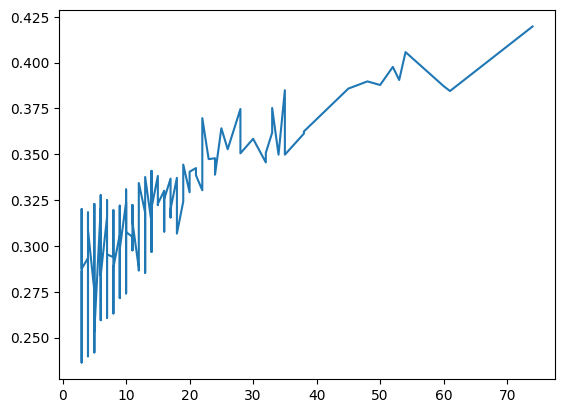

In [86]:
plt.plot(ND[Arg_D],CL_a[Arg_D])

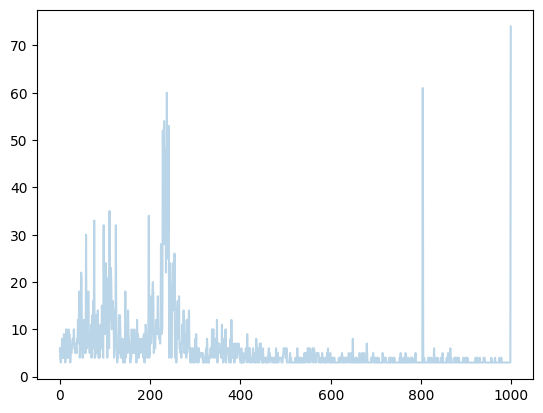

In [87]:
plt.plot(ND[np.argsort(B_T[8]//(2*np.pi))],alpha=0.3)


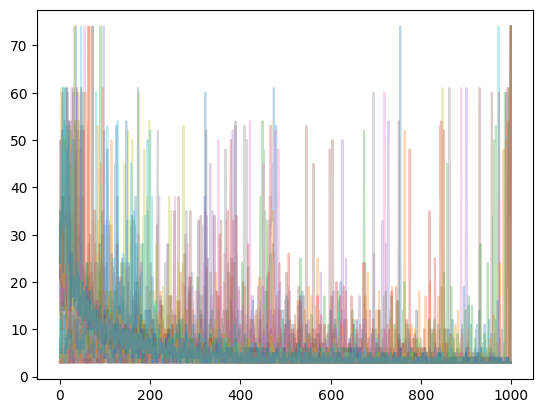

In [88]:
for i in range(len(B_T)):
    plt.plot(ND[np.argsort(B_T[i])],alpha=0.3)

In [89]:
UND = np.unique(ND)
arg_ND = {}
for D_ in UND:
    arg_ND[D_], = np.where(ND==D_)

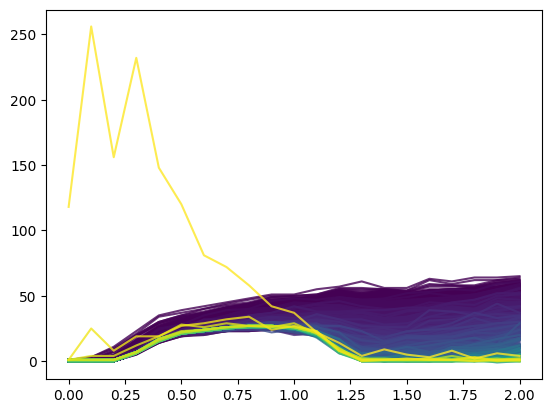

In [91]:
color = np.linspace(0,1,len(UND))
cm = plt.cm.viridis(color)
for D_,c in zip(UND,cm):
    plt.plot(Ds,np.sort(B_T[:,arg_ND[D_]]//(np.pi*2),axis=1),color=c,alpha=0.8)


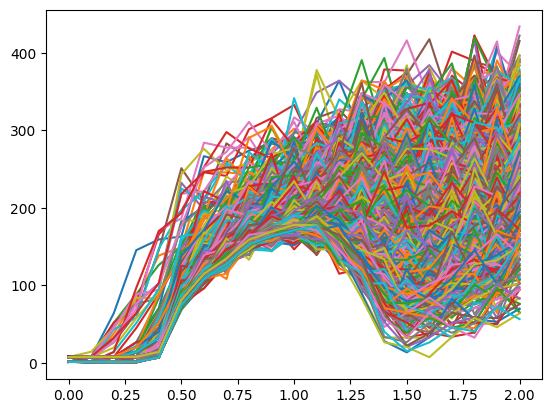

In [71]:
plt.plot(Ds,B_T[:,np.argsort(CL_a)])

In [ ]:
B_RM,B_S,B_C = [],[],[]
B_RA = []
B_Ts = []
for seed in tqdm(range(50)):
    np.random.seed(0)
    theta_random = np.random.uniform(0,2*np.pi,N)
    B_ra = []
    B_rm = []
    B_sigmas = []
    B_chis = []
    Ts = []

    for T,RA,RM,chi,sigma_phi in parmap.map(get_sol_MF_Last,Ds,theta_random,t,b,omega,N,K,pm_pbar=False, pm_processes=8):
        Ts.append(T)
        B_ra.append(RA)
        B_rm.append(RM)
        B_sigmas.append(sigma_phi)
        B_chis.append(chi)
    B_RM.append(B_rm)
    B_RA.append(B_ra)
    B_S.append(B_sigmas)
    B_C.append(B_chis)
    B_Ts.append(Ts)